# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.stl_approach import STLApproach
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

 ==> Restrict GPU memory growth: True


# Start Network runner

In [5]:
DATASET = Dataset.FVC_ICAO
APPROACH = NAS_MTLApproach.APPROACH_2

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS with Approach 2 Fixed',
        'tags': [f'{DATASET.value["name"]}'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'dataset': DATASET,
        'tasks': DATASET.value['tasks'],
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        #'max_blocks_per_branch': 5,
        #'n_child_epochs': N_CHILD_EPOCHS,
        #'controller_epochs': CONTROLLER_EPOCHS,
        #'controller_batch_size': 64,
        #'n_trials': N_TRIALS,

        'controller_sampling_epochs': 2,
        'samples_per_controller_epochs': 3,
        'controller_training_epochs': 5,
        'architecture_training_epochs': 2,
        'controller_loss_alpha': 0.9
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': True
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': True
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 110078
Process ID: 113693
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_use_predictor': True},
 'exp_params': {'description': 'NAS with Approach 2 Fixed',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['fvc_icao']},
 'mlp_params': {'max_architecture_length': 5,
                'min_task_group_size': 3,
                'mlp_base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0

# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


In [7]:
runner.train_data.head()

,origin,img_name,mouth,rotation,l_away,eyes_closed,close,hat,dark_glasses,frames_heavy,...,sh_head,blurred,ink_mark,skin_tone,washed_out,pixelation,hair_eyes,background,red_eyes,aligned
0,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
1,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
2,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
3,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False
4,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False


# <font color='red'>Producing Fake Data</font>

In [8]:
runner.produce_fake_data()

-------------------- producing fake data for experimental purposes -------------------
fake_train_data.shape: (500, 26)
fake_validation_data_df.shape: (100, 26)
fake_test_data_df.shape: (50, 26)


# Data Generators

In [9]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 500 validated image filenames.
Found 100 validated image filenames.
Found 50 validated image filenames.
TOTAL: 650

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [10]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [11]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search - v2

In [12]:
best_archs_list = runner.run_neural_architecture_search_v2()

-------------------- run neural architecture search -------------------
Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
------------------------------------------------------------------
                       CONTROLLER EPOCH: 0
------------------------------------------------------------------
GENERATING ARCHITECTURE SAMPLES...
------------------------------------------------------
Sequence: [6, 20]
 .Decoded seq: {'n_denses_1': 2, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [10, 17, 1, 5, 20]
 .Decoded seq: {'n_denses_1': 3, 'n_denses_0': 2, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [2, 15, 4, 18, 20]
 .Decoded seq: {'n_denses_1': 5, 'n_denses_2': 4, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [4, 18, 17, 12, 20]


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss did not improve from 3.17061
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
2/2 [==============================] - 8s 3s/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.46670 | EER_interp: 0.46970 | ACC: 0.53000
  Task  1: rotation        | EER_mean: 0.46340 | EER_interp: 0.45200 | ACC: 0.55000
  Task  2: l_away          | EER_mean: 0.51160 | EER_interp: 0.50140 | ACC: 0.50000
  Task  3: eyes_closed     | EER_mean: 0.52000 | EER_interp: 0.52000 | ACC: 0.48000
  Task  4: close           | EER_mean: 0.53060 | EER_interp: 0.53000 | ACC: 0.47000
  Task  5: hat             | EER_mean: 0.46550 | EER_interp: 0.45900 | ACC: 0.54000
  Task  6: dark_glasses    | EER_mean: 0.46670 | EER_interp: 0.45160 | ACC: 0.55000
  Task  7: frames_heavy    | EER_mean: 0.48940 | EER_interp: 0.46170 | ACC: 0.54000
  Task  8: frame_eyes      | EER_mean: 0.36960 | EER_interp: 0.36080 | ACC: 0.64000
  Task  9: flash_lenses    |

# Create Model with Best Architecture Found

In [29]:
#best_arch = {'n_denses_0':2,'n_denses_1':2,'n_denses_2':2,'n_denses_3':2}
best_arch = best_archs_list[0]['Decoded architecture'] if best_archs_list is not None else None

In [32]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [33]:
%%capture
runner.visualize_model(outfile_path=f"training/figs/nas/nas_model_{APPROACH.name}.png")

FileNotFoundError: [Errno 2] No such file or directory: 'figs/nas/nas_model_APPROACH_2.png'

In [16]:
%%capture
runner.model_summary()

# Training Model

In [17]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 4,342,126
  .. Trainable params: 2,084,142
  .. Non-trainable params: 2,257,984
Epoch 1/50
7/7 [==============================] - 51s 6s/step - loss: 1.6900 - background_loss: 0.7027 - close_loss: 0.7197 - ink_mark_loss: 0.7173 - pixelation_loss: 0.7004 - washed_out_loss: 0.6980 - blurred_loss: 0.6981 - sh_head_loss: 0.6994 - mouth_loss: 0.7177 - veil_loss: 0.7123 - red_eyes_loss: 0.7528 - flash_lenses_loss: 0.7755 - dark_glasses_loss: 0.8006 - l_away_loss: 0.7836 - frame_eyes_loss: 0.7780 - hair_eyes_loss: 0.9308 - eyes_closed_loss: 0.7793 - frames_heavy_loss: 0.7531 - sh_face_loss: 0.6939 - skin_tone_loss: 0.7000 - light_loss: 0.6976 - hat_loss: 0.7013 - rotation_loss: 0.6945 - reflection_loss: 0.6934 - background_accuracy: 0.4587 - close_accuracy: 0.4862 - ink_mark_accuracy: 0.4472 - pixelation_accuracy: 0.4908 - washed_out_accuracy: 0.5229 - blurre

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
7/7 [==============================] - 35s 5s/step - loss: 1.5712 - background_loss: 0.6938 - close_loss: 0.6936 - ink_mark_loss: 0.6936 - pixelation_loss: 0.6874 - washed_out_loss: 0.6895 - blurred_loss: 0.6863 - sh_head_loss: 0.6897 - mouth_loss: 0.6813 - veil_loss: 0.6835 - red_eyes_loss: 0.6549 - flash_lenses_loss: 0.6612 - dark_glasses_loss: 0.6783 - l_away_loss: 0.6836 - frame_eyes_loss: 0.6924 - hair_eyes_loss: 0.6789 - eyes_closed_loss: 0.6547 - frames_heavy_loss: 0.6596 - sh_face_loss: 0.6885 - skin_tone_loss: 0.6920 - light_loss: 0.6938 - hat_loss: 0.6921 - rotation_loss: 0.6908 - reflection_loss: 0.6927 - background_accuracy: 0.5092 - close_accuracy: 0.5252 - ink_mark_accuracy: 0.5275 - pixelation_accuracy: 0.5390 - washed_out_accuracy: 0.5390 - blurred_accuracy: 0.5757 - sh_head_accuracy: 0.5482 - mouth_accuracy: 0.6032 - veil_accuracy: 0.5642 - red_eyes_accuracy: 0.6078 - flash_lenses_accuracy: 0.6055 - dark_glasses_accuracy: 0.5550 - l_away_accuracy: 0.5665 - f

# Plots

-------------------- draw training history -------------------


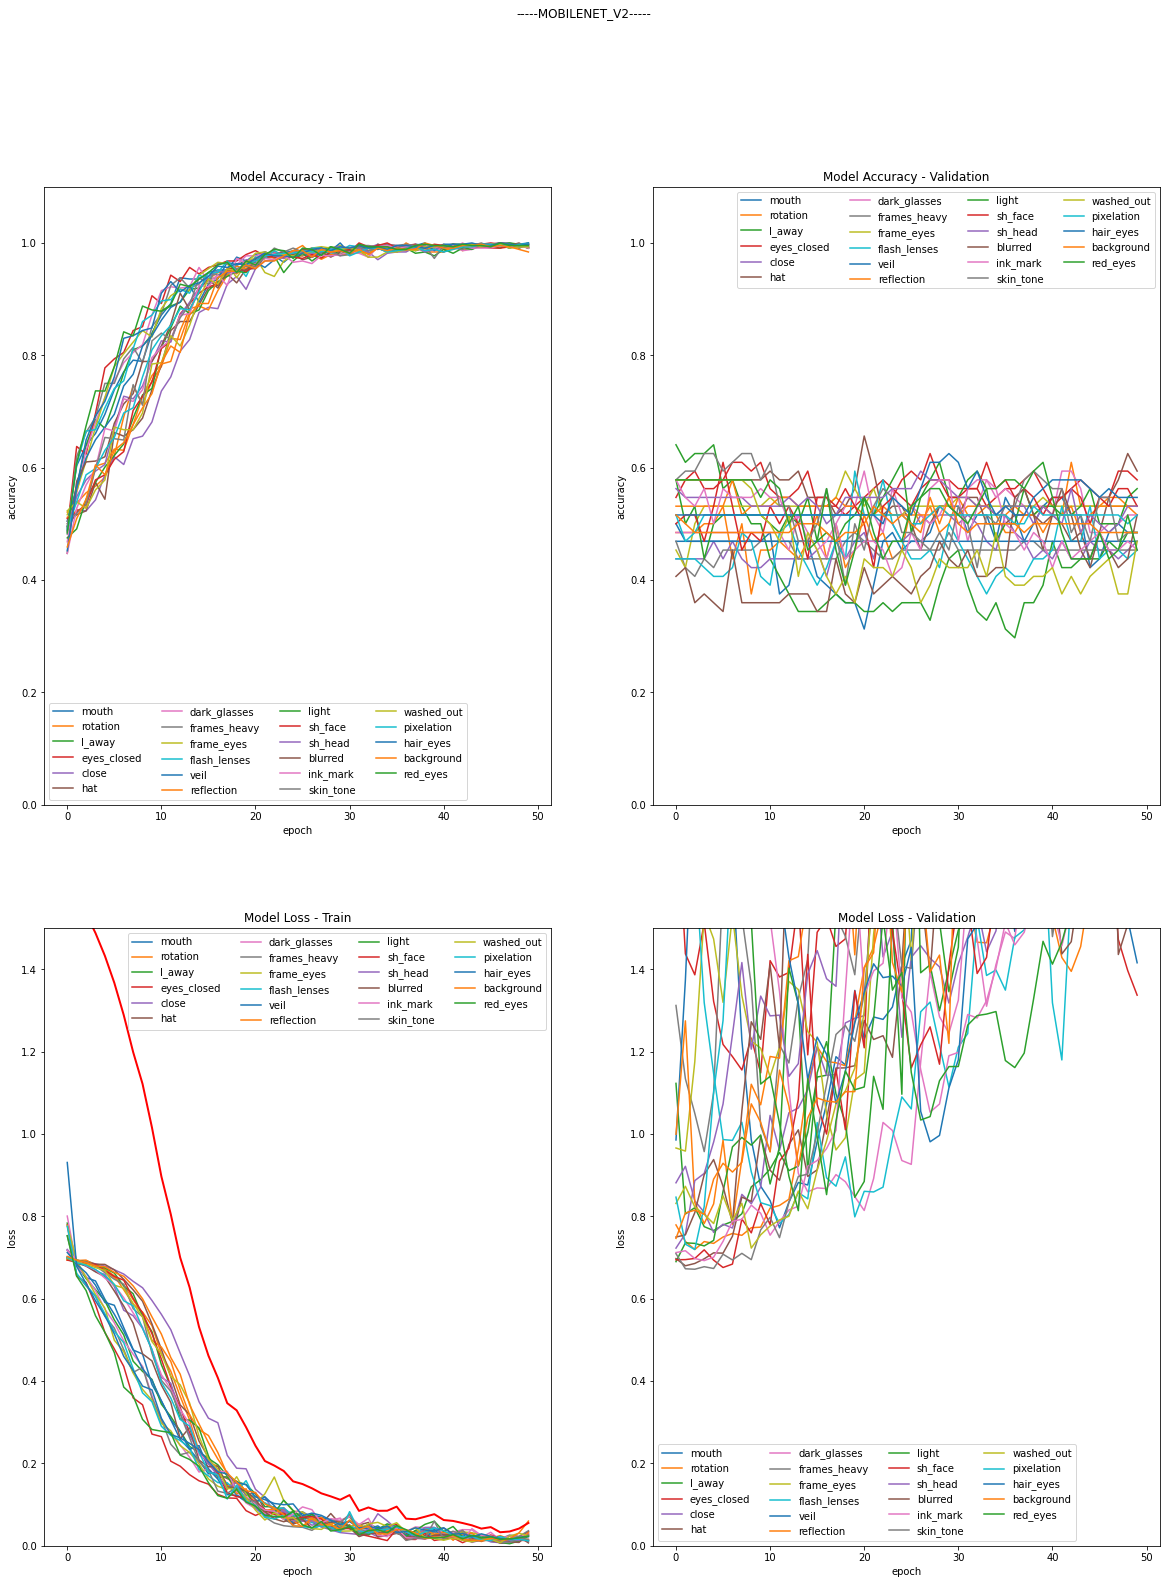

In [18]:
runner.draw_training_history()

# Load Best Model

In [19]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [20]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [21]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
2/2 [==============================] - 8s 3s/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.50910 | EER_interp: 0.49900 | ACC: 0.50000
  Task  1: rotation        | EER_mean: 0.49150 | EER_interp: 0.48960 | ACC: 0.51000
  Task  2: l_away          | EER_mean: 0.42110 | EER_interp: 0.43150 | ACC: 0.57000
  Task  3: eyes_closed     | EER_mean: 0.48000 | EER_interp: 0.48000 | ACC: 0.52000
  Task  4: close           | EER_mean: 0.49020 | EER_interp: 0.49000 | ACC: 0.51000
  Task  5: hat             | EER_mean: 0.48280 | EER_interp: 0.46760 | ACC: 0.53000
  Task  6: dark_glasses    | EER_mean: 0.54550 | EER_interp: 0.53940 | ACC: 0.46000
  Task  7: frames_heavy    | EER_mean: 0.45280 | EER_interp: 0.44980 | ACC: 0.55000
  Task  8: frame_eyes      | EER_mean: 0.45650 | EER_interp: 0.46900 | ACC: 0.53000
  Task  9: flash_lenses    | EER_mean: 0.60420 | EER_interp: 0.60020 | ACC: 0.40000
  Task 10: veil            | EER_mean: 0.4889

## Test Split

In [22]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
1/1 [==============================] - 1s 725ms/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  1: rotation        | EER_mean: 0.54170 | EER_interp: 0.55930 | ACC: 0.44000
  Task  2: l_away          | EER_mean: 0.55560 | EER_interp: 0.55910 | ACC: 0.44000
  Task  3: eyes_closed     | EER_mean: 0.54170 | EER_interp: 0.54010 | ACC: 0.46000
  Task  4: close           | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  5: hat             | EER_mean: 0.51610 | EER_interp: 0.49490 | ACC: 0.50000
  Task  6: dark_glasses    | EER_mean: 0.48150 | EER_interp: 0.50160 | ACC: 0.50000
  Task  7: frames_heavy    | EER_mean: 0.42110 | EER_interp: 0.42020 | ACC: 0.58000
  Task  8: frame_eyes      | EER_mean: 0.52170 | EER_interp: 0.52010 | ACC: 0.48000
  Task  9: flash_lenses    | EER_mean: 0.42860 | EER_interp: 0.41880 | ACC: 0.58000
  Task 10: veil            | EER_mean: 0.4

# Visualize Model Classification

# Finishing Experiment Manager

In [23]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 581 operations to synchronize with Neptune. Do not kill this process.
All 581 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-436
